# Blockbuster


### add gif if needed

# Table of Content

1. Introduction
    * Business Overview of the Movie Industry
    * Business Understanding
    * Business Question/Hypothesis
 
 
2. Data Exploration/Analysis
    * Data Understanding
    * Data Analysis
  
  
3. Hypothesis Testing
    * Statistical Inference
 
 
3. End
    * Recommendations
    * Next Steps


# This notebook was collaborated by all team mates

# Business Overview of the US Movie Industry
Little info about the movie industry, profits, some statistics basically. That will be helpful in forming our hypothesis

# Business Problem/ What the client wants
Computing Vision (a made-up company for the purposes of this project) sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t have much background in creating movies. You are charged with exploring what types of films are currently doing the best at the box office using different samples of available data. You then will translate those findings into actionable insights that the head of Computing Vision's new movie studio can use to help decide what type of films to create.

# Business Questions

## Buisness Question 1:
- Which combination of factors influence the success of a movie in terms of the best ROI?
  ** correlation among the factors- profit, genre, runtime, ratings, etc
 
## Buisness Question 2:
- production budget
_
***

## Buisness Question 3:
- Movie studios that produces a lot of action movies have the best ROI


###  happy to hear what others think in terms of what we should be looking out for in the data
    

# Data Exploration/ Analysis 

In [2]:
# Libraries import
import datetime
from datetime import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sqlite3 #import sqlite 3 module
import os
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Finding the current directory to help with easy read
#NB: Pandas read data from the current directory and may issue an error if the data is not located in the current dir

cwd = os.getcwd()
cwd

'C:\\Users\\Raddodanquah\\Documents\\Flatiron\\group-4-0206_3-4\\Notebooks\\Rich_folder'

In [4]:
# Reading the CSv and tsv files into the instance
DATA_DIR = "../../Data/original_data/"
#DATA_DIR = "C:/Users\Raddodanquah/Documents/Flatiron/group-4-0206_3-4/Data/original_data/"
FILE_NAME1 = "bom.movie_gross.csv"
FILE_NAME2 = "tmdb.movies.csv"
FILE_NAME3 = "tn.movie_budgets.csv"
FILE_NAME4 = "rt_reviews.csv"
FILE_NAME5 = "rt_movie_info.csv"
bom_movies = pd.read_csv(f"{DATA_DIR}{FILE_NAME1}")
tmd_movies= pd.read_csv(f"{DATA_DIR}{FILE_NAME2}")
tn_movies =pd.read_csv(f"{DATA_DIR}{FILE_NAME3}")
rt_reviews =pd.read_csv(f"{DATA_DIR}{FILE_NAME4}", sep='\t', engine='python' )
rt_movie_info =pd.read_csv(f"{DATA_DIR}{FILE_NAME5}", sep='\t', engine='python' )

In [1]:
# Connecting to the db file
# NB: Just like the other reads, make sure the db connection is done in the right dir to avoid errors/empty tables

dbfile ="../../Data/im_combined.db"
# Create a SQL connection to our SQLite database
con = sqlite3.connect(dbfile)

# creating cursor
cur = con.cursor()

# reading all table names
#table_list = [a for a in cur.execute("SELECT name FROM sqlite_master WHERE type = 'table'")]
# here is you table list
#print(table_list)

# Be sure to close the connection
#con.close()

NameError: name 'sqlite3' is not defined

# Understand the data - A focus on the columns and the data type respectively

- bom_movies details
 * Data file has 3387 rows with 5 columns
   * The columns are : title', 'studio', 'domestic_gross', 'foreign_gross', 'year'
 * There are missing data that we need to investigate and determine the best way to resolve this
 * Year column data type needs to be changed from int to datetime
 * foreign_gross data type needs to be changed to int and so is the domestic_gross
 * Convert the domestic_gross and foreign_gross into a more easy way to read, divide by 1,000,000
 *  <span style="color:red"> May need to remove the studio column- early to decide  </style>
 * <span style="color:green"> We will assume that the domestic and foreign gross revenue are in us dollars </style>

 
 
 - tmd_movies details
  * Data file has 26517 rows with 10 columns
    * The columns are : 'Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title','popularity', 'release_date',    'title', 'vote_average', 'vote_count'
  * There are no missing data - whewww!!(just kidding)
  * Release date column data type needs to be changed to datetime
  *  <span style="color:red"> May need to remove some colums: unnamed, genre_ids?(maybe), original_title is redundant with title and original languae column- has 1 unique data type  </style>
  * <span style="color:green"> We will assume that with popularity, the bigger the number, the higher the popularity </style>
 
 
  - tn_movie_budget details
   * Data file has 5782 rows with 6 columns
    * The columns are : id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'
   * There are no missing data - whewww!!
   * release_date column data type needs to be changed to datetime
   * Production_budget, domestic_gross and worldwide_gross should all be float with easy to read data values
  
 
 - rt_movie_info details
  * Data file has 1560 rows with 12 columns
    * The columns are : 'id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'
   * Other than Id column, the rest of the data has missing values
     * The columns that have more than 2/3rd of missing values can be dropped
       * Studio
       * box_office
       * currency
   * runtime column data type needs to be changed to datetime
   * rating columns to integer
   * Production_budget, domestic_gross and worldwide_gross should all be float with easy to read data values
  


# Data Cleansing and feature selection 
- Data cleansing is the process of ensuring that that the data is in its ready state to be used for analysis.
  * Focus will be setting the columns to the right data type, dealing with null values and dropping for the starter, columns deemed not "relevant" to this analysis
  
- Feature Selection using domain/business knowledge as opposed to using rigourous statistical method of selecton such as LASSO, Ridge, etc
  * Further drop columns that will not be anyway useful to the analysis

# Data Cleansing for Bom Movie data

## Initial data shape (row by col) --- (3387,5)
- Removing null values and changing data type
- Key action
  * foreign_gross has about 40% missing value, so we drop the column
  * The other columns have insignficant amount of missing value so we removed the rows
  
## Final data shape (row by col) --- (3356,4)

In [5]:
bom_movies.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [6]:
bom_movies.isnull().sum() # checking for missing/null/na values in the data

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [7]:
bom_movies.drop(["foreign_gross"], axis = 1, inplace = True) # dropped foreign_gross from the data
bom_movies.head(4)

,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010


In [8]:
new_bom_movies= bom_movies.dropna(axis = 0, how ='any') # dropped all othe na/null/missing value from the remaining data
new_bom_movies.isnull().sum()

title             0
studio            0
domestic_gross    0
year              0
dtype: int64

<Figure size 720x432 with 0 Axes>

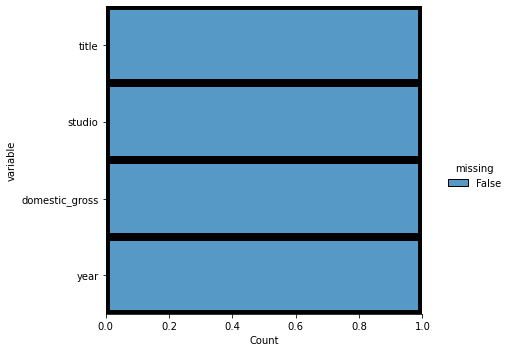

In [9]:
# Visualizing data for missing value
# As you can see, there are no missing values
plt.figure(figsize=(10,6))
sns.displot(
    data=new_bom_movies.isnull().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
new_bom_movies.image = plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

In [10]:
new_bom_movies['domestic_gross']= new_bom_movies['domestic_gross'].astype(int) # Changing data type to Int
#new_bom_movies['year']= pd.to_datetime(bom_movies.year, format='%Y%') # Changing data type to date

In [ ]:
new_bom_movies.info() # making sure the data is in the form that we want it to be, cols, data types, etc

# Data Cleansing for tmd movie data

## Initial data shape (row by col) --- (26517,10)
- This dataset has no missing value as shown in the graph
- Need to drop some columns that are not relevant to our business case
   * Unnamed
   * genre_ids
   * original_title is redundant with title
- Change column data type
   * release_date to date data type
   
## Final data shape (row by col) --- (26517,7)

<Figure size 720x432 with 0 Axes>

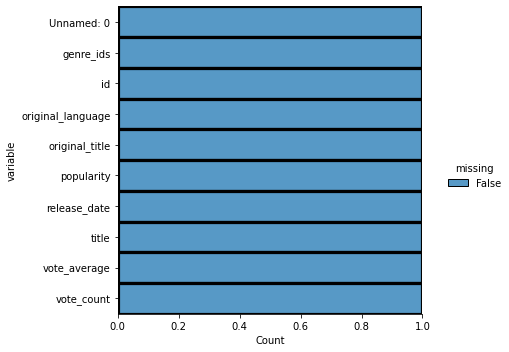

In [11]:
# Visualizing data for missing value
# As you can see, there are no missing values, which means less work in that regard :)
plt.figure(figsize=(10,6))
sns.displot(
    data=tmd_movies.isnull().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
tmd_movies_image= plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

In [12]:
tmd_movies.reindex()
new_tmd_movies= tmd_movies.drop(tmd_movies.columns[[0, 1,4]], axis=1)
new_tmd_movies

,id,original_language,popularity,release_date,title,vote_average,vote_count
0,12444,en,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,10191,en,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,10138,en,28.515,2010-05-07,Iron Man 2,6.8,12368
3,862,en,28.005,1995-11-22,Toy Story,7.9,10174
4,27205,en,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...
26512,488143,en,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,485975,en,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,381231,en,0.600,2018-10-01,The Last One,0.0,1
26515,366854,en,0.600,2018-06-22,Trailer Made,0.0,1


In [13]:
new_tmd_movies.info() # checking to see the data type and what needs to be changed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 26517 non-null  int64  
 1   original_language  26517 non-null  object 
 2   popularity         26517 non-null  float64
 3   release_date       26517 non-null  object 
 4   title              26517 non-null  object 
 5   vote_average       26517 non-null  float64
 6   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 1.4+ MB


In [14]:
# Changing data type to date
new_tmd_movies[' release_date']= pd.to_datetime(new_tmd_movies. release_date, format= '%Y-%m-%d') 

In [15]:
new_tmd_movies.info() # release date has the date datat type now

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 26517 non-null  int64         
 1   original_language  26517 non-null  object        
 2   popularity         26517 non-null  float64       
 3   release_date       26517 non-null  object        
 4   title              26517 non-null  object        
 5   vote_average       26517 non-null  float64       
 6   vote_count         26517 non-null  int64         
 7    release_date      26517 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 1.6+ MB


# Data Cleansing for tn movie data

## Initial data shape (row by col) --- (5782,6)
- This dataset has no missing value as shown in the graph
- Drop the wordwide gross as the focus of this business case will be on domestic gross revenue
- Change column data type
   * release_date should be consistent withthe format and type like the other tables
   * domestic_gross and production budget format should be the same in other tables, no dollar sign, no commas
   
## Final data shape (row by col) --- (5782,5)

<Figure size 720x432 with 0 Axes>

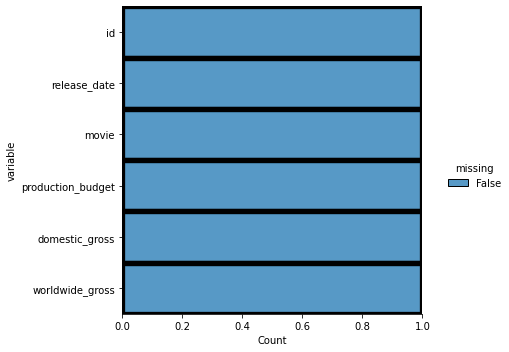

In [16]:
# Visualizing data for missing value
# As you can see, there are no missing values
plt.figure(figsize=(10,6))
sns.displot(
    data=tn_movies.isnull().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

In [21]:
tn_movies['release_date'].min() # preview the data set

'Apr 1, 1975'

In [18]:
new_tn_movies= tn_movies.drop(tn_movies.columns[5], axis=1)
new_tn_movies

,id,release_date,movie,production_budget,domestic_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382"
...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0


In [19]:
# converting production_budget and domestic_gross columns into int and a consistent format just like others with no comma or $
new_tn_movies['production_budget']= new_tn_movies['production_budget'].str.replace(',', '').str.replace('$', '').astype(int)
new_tn_movies['domestic_gross']= new_tn_movies['domestic_gross'].str.replace(',', '').str.replace('$', '').astype(int)

In [20]:
new_tn_movies.head()

,id,release_date,movie,production_budget,domestic_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382


In [ ]:
new_tn_movies.info()

# Getting error converting,will revert

In [ ]:

# changing to a consistent date type 
new_tn_movies['release_date']= pd.to_datetime(new_tn_movies['release_date'], ,errors = 'coerce',format = '%Y-%m-%d').dt.strftime("%Y%m")

# Data Cleansing for rt movie info data

## Initial data shape (row by col) --- (1560,12)
- This dataset hassome missing values, some as high as about 2/3rd missing values
- Columns dropped
   * studio, currency, and box_office will be dropped due to a significant amount of missing data
   * synopsis which is just a brief summary of the movie will not be in scope for our work
   
- Create a new column (runtime_mins) and make the data type int

## Final data shape (row by col) --- (1032,8)

In [ ]:
rt_movie_info.head() # display the first few roles for review

In [ ]:
rt_movie_info.info()

In [ ]:
# Visualizing data for missing value
# As you can see, there are no missing values [ cols with true or a mixture of orange and blue color]
plt.figure(figsize=(10,6))
sns.displot(
    data=rt_movie_info.isnull().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

In [ ]:
# drop the already mentioned columns [studio,box_office,currency](they have significant high volume of missing data), 
# drop [synopsis,theater_date,dvd_date]-- nto in scope for our business case
# create a new df for the in scope features
new_rt_movie_info= rt_movie_info[['id','rating', 'genre', 'director', 'writer','runtime']] # cols interested

In [ ]:
new_rt_movie_info

In [ ]:
# Visualizing data for missing value for the new df
# As you can see, there are no missing values [ cols with true or a mixture of orange and blue color]
plt.figure(figsize=(10,6))
sns.displot(
    data=new_rt_movie_info.isnull().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

# for now we will keep the data as it is without removing any missing data. We can always come back and 
## take them out if needed


In [ ]:
new_rt_movie_info.info() # checking to see the data type for the runtime col

In [ ]:
#split team column into two columns
new_rt_movie_info[['runtime/mins', 'minutes']] = new_rt_movie_info['runtime'].str.split(' ', 1, expand=True)



In [ ]:
new_rt_movie_info.head()

In [ ]:
new_rt_movie_info.info()

In [ ]:
new_rt_movie_info= new_rt_movie_info.dropna(axis = 0, how ='any') # dropped all othe na/null/missing value from the remaining data
new_rt_movie_info.isnull().sum()

In [ ]:
# Visualizing data for missing value for the new df
# As you can see, there are no missing values now
plt.figure(figsize=(10,6))
sns.displot(
    data=new_rt_movie_info.isnull().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

# for now we will keep the data as it is without removing any missing data. We can always come back and 
## take them out if needed


In [ ]:
new_rt_movie_info['runtime/mins']= new_rt_movie_info['runtime/mins'].astype(int) # Changing data type to Int

In [ ]:
new_rt_movie_info.info()

# Take out the other 2 unwanted cols, runtime & minutes

In [ ]:
new_rt_movie_info= rt_movie_info[['id','rating', 'genre', 'director', 'writer','runtime/mins']] # cols interested

# So far with the flat files we have in good shape are:
## new_bom_movies
## new_rt_movie_info
## new_tmd_movies
## new_tn_movies



In [ ]:
new_rt_movie_info

### Pull two tables from the database 

In [ ]:
# Connecting to the db file
# NB: Just like the other reads, make sure the db connection is done in the right dir to avoid errors/empty tables

dbfile ="C:/Users\Raddodanquah/Documents/Flatiron/Final_project_Group4/Data/im.db"
# Create a SQL connection to our SQLite database
con = sqlite3.connect(dbfile)

# creating cursor
cur = con.cursor()

# reading all table names
table_list = [a for a in cur.execute("SELECT name FROM sqlite_master WHERE type = 'table'")]
# here is you table list
print(table_list)

# Be sure to close the connection
#con.close()

In [ ]:
# Data is from 2010 and above because we dont financials for years less than 2010

q = """
SELECT a.movie_id,a.primary_title,a.start_year,a.runtime_minutes,a.genres, b.averagerating,b.numvotes
FROM movie_basics a
JOIN movie_ratings b
USING (movie_id)
where start_year >=2010
;"""
db_database = pd.read_sql(q, con)

con.close()

In [ ]:
db_database

# Blockbuster


### add gif if needed

# Table of Content

1. Introduction
    * Business Overview of the Movie Industry
    * Business Understanding
    * Business Question/Hypothesis
 
 
2. Data Exploration/Analysis
    * Data Understanding
    * Data Analysis
  
  
3. Hypothesis Testing
    * Statistical Inference
 
 
3. End
    * Recommendations
    * Next Steps


# Business Overview of the US Movie Industry
Little info about the movie industry, profits, some statistics basically. That will be helpful in forming our hypothesis

# Business Problem/ What the client wants
Computing Vision (a made-up company for the purposes of this project) sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t have much background in creating movies. You are charged with exploring what types of films are currently doing the best at the box office using different samples of available data. You then will translate those findings into actionable insights that the head of Computing Vision's new movie studio can use to help decide what type of films to create.

# Business Questions
1. What type of films are doing the best at the box office
- Are high budget movies yielding higher profits:
- What genre of movies will provide the business with the best ROI?
- Are there any correlation between movie popularity and profit?
- Which combination of features will influence profit
  * Genre
  * Ratings
  * Duration
  * Time of release
  * Star Power?
  * 
 
    

# Data Exploration/ Analysis 

In [ ]:
# Libraries import
import datetime
from datetime import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sqlite3 #import sqlite 3 module
import os

In [ ]:
# Finding the current directory to help with easy read
#NB: Pandas read data from the current directory and may issue an error if the data is not located in the current dir

cwd = os.getcwd()
cwd

In [ ]:
# Reading the CSv and tsv files into the instance

DATA_DIR = "C:/Users\Raddodanquah/Documents/Flatiron/Final_project_Group4/Data/"
FILE_NAME1 = "bom.movie_gross.csv"
FILE_NAME2 = "tmdb.movies.csv"
FILE_NAME3 = "tn.movie_budgets.csv"
FILE_NAME4 = "rt.reviews.tsv"
FILE_NAME5 = "rt.movie_info.tsv"
bom_movies = pd.read_csv(f"{DATA_DIR}{FILE_NAME1}")
tmd_movies= pd.read_csv(f"{DATA_DIR}{FILE_NAME2}")
tn_movies =pd.read_csv(f"{DATA_DIR}{FILE_NAME3}")
rt_reviews =pd.read_csv(f"{DATA_DIR}{FILE_NAME4}", sep='\t', engine='python' )
rt_movie_info =pd.read_csv(f"{DATA_DIR}{FILE_NAME5}", sep='\t', engine='python' )

In [ ]:
# Connecting to the db file
# NB: Just like the other reads, make sure the db connection is done in the right dir to avoid errors/empty tables

dbfile ="C:/Users\Raddodanquah/Documents/Flatiron/Final_project_Group4/Data/im.db"
# Create a SQL connection to our SQLite database
con = sqlite3.connect(dbfile)

# creating cursor
cur = con.cursor()

# reading all table names
table_list = [a for a in cur.execute("SELECT name FROM sqlite_master WHERE type = 'table'")]
# here is you table list
print(table_list)

# Be sure to close the connection
con.close()

# Understand the data - A focus on the columns and the data type respectively

- bom_movies details
 * Data file has 3387 rows with 5 columns
   * The columns are : title', 'studio', 'domestic_gross', 'foreign_gross', 'year'
 * There are missing data that we need to investigate and determine the best way to resolve this
 * Year column data type needs to be changed from int to datetime
 * foreign_gross data type needs to be changed to int and so is the domestic_gross
 * Convert the domestic_gross and foreign_gross into a more easy way to read, divide by 1,000,000
 *  <span style="color:red"> May need to remove the studio column- early to decide  </style>
 * <span style="color:green"> We will assume that the domestic and foreign gross revenue are in us dollars </style>

 
 
 - tmd_movies details
  * Data file has 26517 rows with 10 columns
    * The columns are : 'Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title','popularity', 'release_date',    'title', 'vote_average', 'vote_count'
  * There are no missing data - whewww!!(just kidding)
  * Release date column data type needs to be changed to datetime
  *  <span style="color:red"> May need to remove some colums: unnamed, genre_ids?(maybe), original_title is redundant with title and original languae column- has 1 unique data type  </style>
  * <span style="color:green"> We will assume that with popularity, the bigger the number, the higher the popularity </style>
 
 
  - tn_movie_budget details
   * Data file has 5782 rows with 6 columns
    * The columns are : id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'
   * There are no missing data - whewww!!
   * release_date column data type needs to be changed to datetime
   * Production_budget, domestic_gross and worldwide_gross should all be float with easy to read data values
  
 
 - rt_movie_info details
  * Data file has 1560 rows with 12 columns
    * The columns are : 'id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'
   * Other than Id column, the rest of the data has missing values
     * The columns that have more than 2/3rd of missing values can be dropped
       * Studio
       * box_office
       * currency
   * runtime column data type needs to be changed to datetime
   * rating columns to integer
   * Production_budget, domestic_gross and worldwide_gross should all be float with easy to read data values
  


# Data Cleansing and feature selection 
- Data cleansing is the process of ensuring that that the data is in its ready state to be used for analysis.
  * Focus will be setting the columns to the right data type, dealing with null values and dropping for the starter, columns deemed not "relevant" to this analysis
  
- Feature Selection using domain/business knowledge as opposed to using rigourous statistical method of selecton such as LASSO, Ridge, etc
  * Further drop columns that will not be anyway useful to the analysis

# Data Cleansing for Bom Movie data

## Initial data shape (row by col) --- (3387,5)
- Removing null values and changing data type
- Key action
  * foreign_gross has about 40% missing value, so we drop the column
  * The other columns have insignficant amount of missing value so we removed the rows
  
## Final data shape (row by col) --- (3356,4)

In [ ]:
bom_movies.head()

In [ ]:
bom_movies.isnull().sum() # checking for missing/null/na values in the data

In [ ]:
bom_movies.drop(["foreign_gross"], axis = 1, inplace = True) # dropped foreign_gross from the data
bom_movies.head(4)

In [ ]:
new_bom_movies= bom_movies.dropna(axis = 0, how ='any') # dropped all othe na/null/missing value from the remaining data
new_bom_movies.isnull().sum()

In [ ]:
# Visualizing data for missing value
# As you can see, there are no missing values
plt.figure(figsize=(10,6))
sns.displot(
    data=new_bom_movies.isnull().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

In [ ]:
new_bom_movies['domestic_gross']= new_bom_movies['domestic_gross'].astype(int) # Changing data type to Int
new_bom_movies['year']= pd.to_datetime(bom_movies.year, format='%Y%') # Changing data type to date

In [ ]:
new_bom_movies.info()

# Data Cleansing for tmd movie data

## Initial data shape (row by col) --- (26517,10)
- This dataset has no missing value as shown in the graph
- Need to drop some columns that are not relevant to our business case
   * Unnamed
   * genre_ids
   * original_title is redundant with title
- Change column data type
   * release_date to date data type
   
## Final data shape (row by col) --- (26517,7)

In [ ]:
# Visualizing data for missing value
# As you can see, there are no missing values
plt.figure(figsize=(10,6))
sns.displot(
    data=tmd_movies.isnull().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

In [ ]:
tmd_movies.reindex()
new_tmd_movies= tmd_movies.drop(tmd_movies.columns[[0, 1,4]], axis=1)
new_tmd_movies

In [ ]:
new_tmd_movies.info() # checking to see the data type and what needs to be changed

In [ ]:
# Changing data type to date
new_tmd_movies[' release_date']= pd.to_datetime(new_tmd_movies. release_date, format= '%Y-%m-%d') 

In [ ]:
new_tmd_movies.info() # release date has the date datat type now

# Data Cleansing for tn movie data

## Initial data shape (row by col) --- (5782,6)
- This dataset has no missing value as shown in the graph
- Drop the wordwide gross as the focus of this business case will be on domestic gross revenue
- Change column data type
   * release_date should be consistent withthe format and type like the other tables
   * domestic_gross and production budget format should be the same in other tables, no dollar sign, no commas
   
## Final data shape (row by col) --- (5782,5)

In [ ]:
# Visualizing data for missing value
# As you can see, there are no missing values
plt.figure(figsize=(10,6))
sns.displot(
    data=tn_movies.isnull().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

In [ ]:
tn_movies.head() # preview the data set

In [ ]:
new_tn_movies= tn_movies.drop(tn_movies.columns[5], axis=1)
new_tn_movies

In [ ]:
# converting production_budget and domestic_gross columns into int and a consistent format just like others with no comma or $
new_tn_movies['production_budget']= new_tn_movies['production_budget'].str.replace(',', '').str.replace('$', '').astype(int)
new_tn_movies['domestic_gross']= new_tn_movies['domestic_gross'].str.replace(',', '').str.replace('$', '').astype(int)

In [ ]:
new_tn_movies.head()

In [ ]:
new_tn_movies.info()

# Getting error converting,will revert

In [ ]:

# changing to a consistent date type 
new_tn_movies['release_date']= pd.to_datetime(new_tn_movies['release_date'], ,errors = 'coerce',format = '%Y-%m-%d').dt.strftime("%Y%m")

# Data Cleansing for rt movie info data

## Initial data shape (row by col) --- (1560,12)
- This dataset hassome missing values, some as high as about 2/3rd missing values
- Columns dropped
   * studio, currency, and box_office will be dropped due to a significant amount of missing data
   * synopsis which is just a brief summary of the movie will not be in scope for our work
   
- Create a new column (runtime_mins) and make the data type int

## Final data shape (row by col) --- (1032,8)

In [ ]:
rt_movie_info.head() # display the first few roles for review

In [ ]:
rt_movie_info.info()

In [ ]:
# Visualizing data for missing value
# As you can see, there are no missing values [ cols with true or a mixture of orange and blue color]
plt.figure(figsize=(10,6))
sns.displot(
    data=rt_movie_info.isnull().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

In [ ]:
# drop the already mentioned columns [studio,box_office,currency](they have significant high volume of missing data), 
# drop [synopsis,theater_date,dvd_date]-- nto in scope for our business case
# create a new df for the in scope features
new_rt_movie_info= rt_movie_info[['id','rating', 'genre', 'director', 'writer','runtime']] # cols interested

In [ ]:
new_rt_movie_info

In [ ]:
# Visualizing data for missing value for the new df
# As you can see, there are no missing values [ cols with true or a mixture of orange and blue color]
plt.figure(figsize=(10,6))
sns.displot(
    data=new_rt_movie_info.isnull().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

# for now we will keep the data as it is without removing any missing data. We can always come back and 
## take them out if needed


In [ ]:
new_rt_movie_info.info() # checking to see the data type for the runtime col

In [ ]:
#split team column into two columns
new_rt_movie_info[['runtime/mins', 'minutes']] = new_rt_movie_info['runtime'].str.split(' ', 1, expand=True)



In [ ]:
new_rt_movie_info.head()

In [ ]:
new_rt_movie_info.info()

In [ ]:
new_rt_movie_info= new_rt_movie_info.dropna(axis = 0, how ='any') # dropped all othe na/null/missing value from the remaining data
new_rt_movie_info.isnull().sum()

In [ ]:
# Visualizing data for missing value for the new df
# As you can see, there are no missing values now
plt.figure(figsize=(10,6))
sns.displot(
    data=new_rt_movie_info.isnull().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

# for now we will keep the data as it is without removing any missing data. We can always come back and 
## take them out if needed


In [ ]:
new_rt_movie_info['runtime/mins']= new_rt_movie_info['runtime/mins'].astype(int) # Changing data type to Int

In [ ]:
new_rt_movie_info.info()

# Take out the other 2 unwanted cols, runtime & minutes

In [ ]:
new_rt_movie_info= rt_movie_info[['id','rating', 'genre', 'director', 'writer','runtime/mins']] # cols interested

# So far with the flat files we have in good shape are:
## new_bom_movies
## new_rt_movie_info
## new_tmd_movies
## new_tn_movies



### Pull two tables from the database 

In [27]:
# Connecting to the db file
# NB: Just like the other reads, make sure the db connection is done in the right dir to avoid errors/empty tables

dbfile ="../../Data/im_combined.db"
# Create a SQL connection to our SQLite database
#conn = sqlite3.connect(dbfile)

# creating cursor
#cur = conn.cursor()

# reading all table names
table_list = [a for a in cur.execute("SELECT name FROM sqlite_master WHERE type = 'table'")]
# here is you table list
print(table_list)

# Be sure to close the connection
#con.close()

[('IMDB_movie_basics',), ('IMDB_directors',), ('IMDB_known_for',), ('IMDB_movie_akas',), ('IMDB_movie_ratings',), ('IMDB_persons',), ('IMDB_principals',), ('IMDB_writers',), ('BOM_movie_gross',), ('RT_movie_reviews',), ('TMDB_movie_genres',), ('TN_movie_budgets',), ('TN_movie_budgets_formatted',), ('VIEW_movie_budgets',), ('RT_movie_info',)]


In [34]:
conn.close()

In [44]:
conn = sqlite3.connect('../../Data/im_combined.db')

SQLQuery_2 = """
Select
a.*
,(Select b.genres from IMDB_movie_basics b where b.primary_title = a.title) as Genres
,(Select c1.average_rating from IMDB_movie_basics b1, IMDB_movie_ratings c1 where c1.movie_id = b1.movie_id and b1.primary_title = a.title) as AverageRating

from VIEW_movie_budgets a


;"""

df = pd.read_sql(SQLQuery_2,conn)
df.head()


,Title,studio,TNWorlwideGross,TNDomesticGross,ComputedForeignGross,TNBudget/Cost,Computed_Profit_Loss,year,release_date,Genres,AverageRating
0,10 Cloverfield Lane,Par.,108286422,72082999,36203423,5000000,103286422,2016,3/11/2016,"Drama,Horror,Mystery",7.2
1,12 Strong,WB,71118378,45819713,25298665,35000000,36118378,2018,1/19/2018,"Action,Drama,History",6.6
2,12 Years a Slave,FoxS,181025343,56671993,124353350,20000000,161025343,2013,10/18/2013,"Biography,Drama,History",8.1
3,127 Hours,FoxS,60217171,18335230,41881941,18000000,42217171,2010,11/5/2010,"Adventure,Biography,Drama",7.6
4,13 Hours: The Secret Soldiers of Benghazi,Par.,69411370,52853219,16558151,50000000,19411370,2016,1/15/2016,None,NaN


In [45]:
df.shape

(1255, 11)

In [ ]:
q = """
SELECT *
from IMDB_movie_basics
;"""
df1= pd.read_sql(q, con)

In [ ]:
df1

In [ ]:
df.corr()

In [ ]:
# Data is from 2010 and above because we dont financials for years less than 2010

q = """
SELECT a.movie_id,a.primary_title,a.start_year,a.runtime_minutes,a.genres, b.averagerating,b.numvotes
FROM movie_basics a
JOIN movie_ratings b
USING (movie_id)
where start_year >=2010
;"""
db_database = pd.read_sql(q, con)

con.close()

In [ ]:
db_database